# Activation Maximization for MNIST Dataset

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

### Activation Maximization of the Output Neurons

Class 0 optimized
Class 1 optimized
Class 2 optimized
Class 3 optimized
Class 4 optimized
Class 5 optimized
Class 6 optimized
Class 7 optimized
Class 8 optimized
Class 9 optimized


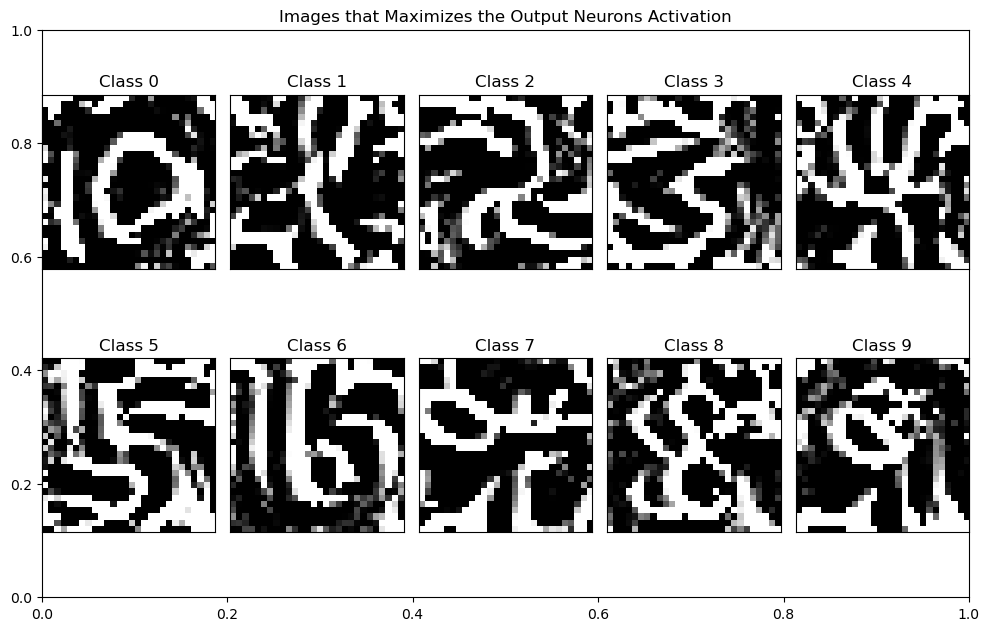

In [3]:
from model_cnn import ConvNet

# Load the model
model = ConvNet()
model.load_state_dict(torch.load('mnist_cnn.pth')) 
model.eval()  # Set the model to evaluation mode

results = []

for out_id in range(10):  # Iterate over all output classes

    # Random image initialization
    input_img = Variable(torch.randn(1, 1, 28, 28), requires_grad=True)  

    # Optimizer
    optimizer = torch.optim.Adam([input_img], lr=0.01, weight_decay=1e-6)

    for iteration in range(5000):  # Number of iterations for gradient ascent
        optimizer.zero_grad()
        
        output = model(input_img)
        target_activation = -output[0, out_id]  # Target activation: negative value of the first output class
        target_activation.backward()
        
        optimizer.step()

        # Regularization: Clip the image values to maintain valid pixel range
        input_img.data = input_img.data.clamp(0, 1)

    # Store the optimized image
    optimized_image = input_img.data.squeeze().numpy()
    results.append(input_img)

    print("Class {} optimized".format(out_id))

# Display the optimized images in a 2x5 grid
fig = plt.figure(figsize=(10, 6))
plt.title(f"Images that Maximizes the Output Neurons Activation")
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(results[i].data.squeeze().numpy(), cmap='gray')
    plt.title(f"Class {i}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()


### Activation Maximization via Deep Generator Networks

Class 0 optimized
Class 1 optimized
Class 2 optimized
Class 3 optimized
Class 4 optimized
Class 5 optimized
Class 6 optimized
Class 7 optimized
Class 8 optimized
Class 9 optimized


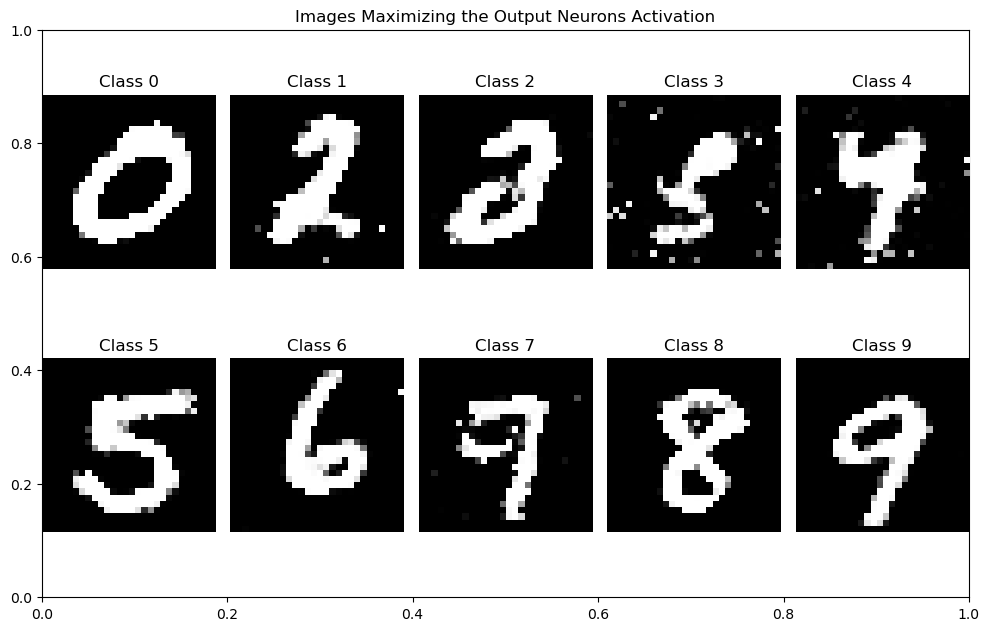

In [5]:
from model_cnn import ConvNet
from model_dgn import Generator

# Load the model and the generator
model = ConvNet()
model.load_state_dict(torch.load('mnist_cnn.pth'))
model.eval() # Set the model to evaluation mode
generator = Generator()
generator.load_state_dict(torch.load('mnist_dgn.pth'))
generator.eval() # Set the generator to evaluation mode

results = []

for out_id in range(10):  # Iterate over all output classes
    # Initialize a latent space vector with random noise
    latent_vector = Variable(torch.randn(1, 100), requires_grad=True)  # Adjust size to match your generator's input
    
    # Optimizer for the latent space vector
    optimizer = torch.optim.Adam([latent_vector], lr=0.001, weight_decay=1e-6)

    for iteration in range(5000): 
        optimizer.zero_grad()
        
        # Generate image from latent vector
        generated_image = generator(latent_vector)

        # Reshape the generated image 
        generated_image = generated_image.view(-1, 1, 28, 28)
        
        # Pass the generated image through ConvNet
        output = model(generated_image)
        
        # Maximize the activation of the target output neuron
        target_activation = -output[0, out_id]
        target_activation.backward()
        
        optimizer.step()

    # Convert generated image for visualization
    optimized_image = generated_image.detach().squeeze().cpu().numpy()
    results.append(optimized_image)
    print(f"Class {out_id} optimized")

# Display the optimized images in a 2x5 grid
fig = plt.figure(figsize=(10, 6))
plt.title("Images Maximizing the Output Neurons Activation")
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(results[i], cmap='gray')
    plt.title(f"Class {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()